In [7]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


In [8]:
import os
# download HybSur data file: https://git.ligo.org/lscsoft/lalsuite-extra/-/blob/master/data/lalsimulation/NRHybSur3dq8_lal.h5
# set path
os.environ['LAL_DATA_PATH'] = '/Users/sebastian.khan/Downloads/'

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})
import lalsimulation as lalsim
import phenom
import numpy as np

import waveform_generator
import hybrid_utils

<Figure size 640x480 with 0 Axes>

In [10]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [11]:
# I don't think this equation is quite correct.
# it doesn't seem to work for the (4,4) mode..
def delta_phi_fn(m):
    z = (-1)*(-1.j)**m
    return np.arctan2(z.imag, z.real)

In [12]:
# modes = [(2,2),(2,1),(3,3),(3,2),(4,4),(4,3)]
# modes = [(2,2),(2,1),(3,3),(4,4)]
modes = [(2,2),(3,2),(4,4)]

In [109]:
scales = np.linspace(-1, 1, 10)
q=2.2
spin1zs=[]
spin2zs=[]
f_min=12
wf_surs=[]
for scale in scales:
    spin1z = -0.85*scale
    spin2z = 0.5*scale
    spin1zs.append(spin1z)
    spin2zs.append(spin2z)
    wf_sur = waveform_generator.generate_pn_waveform(
        q=q,
        modes=modes,
        f_min=f_min,
        S1z=spin1z,
        S2z=spin2z,
        # approximant=lalsim.IMRPhenomTHM,
        approximant=lalsim.NRHybSur3dq8,
        # approximant=lalsim.TaylorT1,
        # approximant=lalsim.SEOBNRv4PHM,
        deltaT=1/8192,
    )
    wf_sur = hybrid_utils.compute_amplitude(wf_sur)
    wf_sur = hybrid_utils.compute_phase(wf_sur)
    wf_sur = hybrid_utils.compute_frequency(wf_sur)
    wf_surs.append(wf_sur.copy())

In [110]:
spin1zs

[0.85,
 0.6611111111111111,
 0.4722222222222222,
 0.2833333333333334,
 0.09444444444444448,
 -0.09444444444444448,
 -0.28333333333333327,
 -0.47222222222222204,
 -0.661111111111111,
 -0.85]

In [111]:
spin2zs

[-0.5,
 -0.3888888888888889,
 -0.2777777777777778,
 -0.16666666666666669,
 -0.05555555555555558,
 0.05555555555555558,
 0.16666666666666663,
 0.2777777777777777,
 0.38888888888888884,
 0.5]

Text(0.5, 1.0, 'Hybrid Sur: q = 2.2')

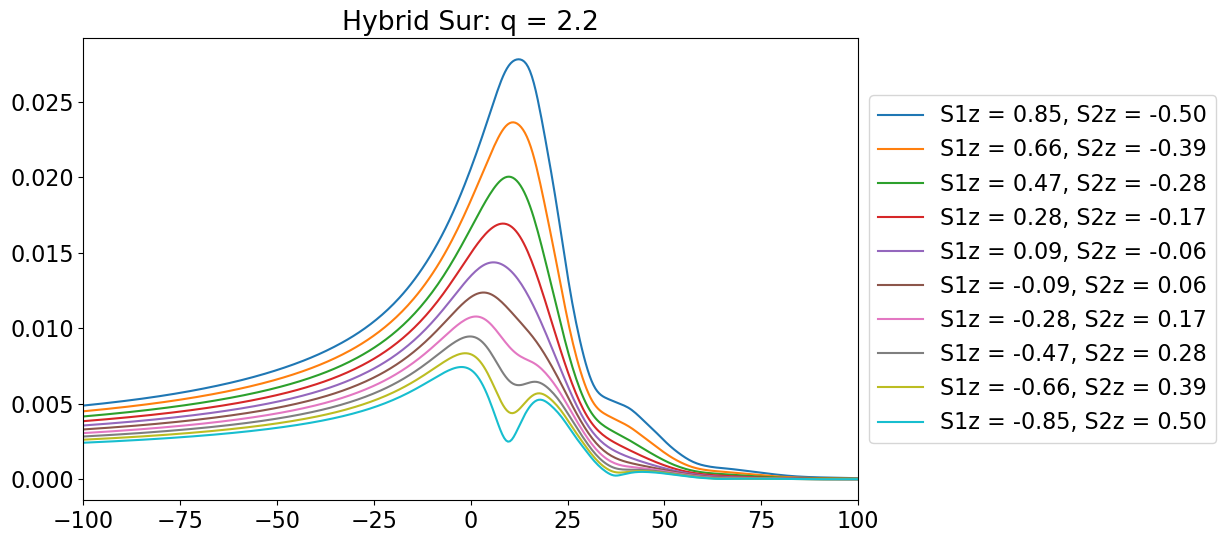

In [112]:
plt.figure(figsize=(10, 6))
for i in range(len(wf_surs)):
    label = f"S1z = {spin1zs[i]:.2f}, S2z = {spin2zs[i]:.2f}"
    plt.plot(wf_surs[i]['t'], np.abs(wf_surs[i]['hlm'][3,2]), label=label)
plt.xlim(-100, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"Hybrid Sur: q = {q}")

In [120]:
# vary mass-ratio
qs = np.linspace(1, 3, 20)
spin1z = -0.85
spin2z = 0.5
f_min=12
wf_surs=[]
for q in qs:
    wf_sur = waveform_generator.generate_pn_waveform(
        q=q,
        modes=modes,
        f_min=f_min,
        S1z=spin1z,
        S2z=spin2z,
        # approximant=lalsim.IMRPhenomTHM,
        approximant=lalsim.NRHybSur3dq8,
        # approximant=lalsim.TaylorT1,
        # approximant=lalsim.SEOBNRv4PHM,
        deltaT=1/8192,
    )
    wf_sur = hybrid_utils.compute_amplitude(wf_sur)
    wf_sur = hybrid_utils.compute_phase(wf_sur)
    wf_sur = hybrid_utils.compute_frequency(wf_sur)
    wf_surs.append(wf_sur.copy())

Text(0.5, 1.0, 'Hybrid Sur: S1z = -0.85 S2z = 0.50')

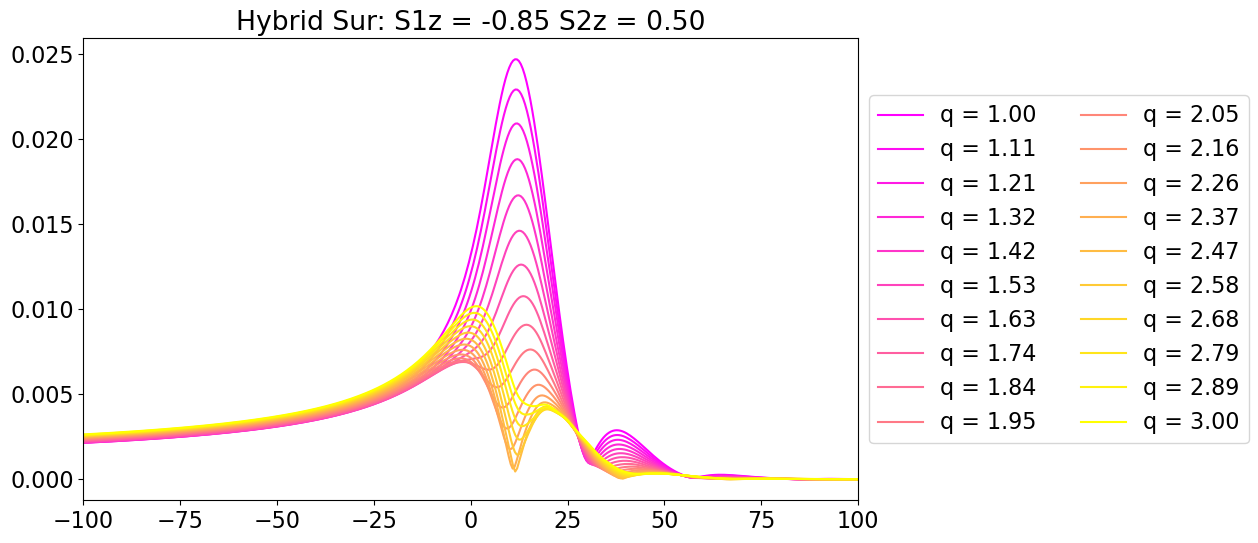

In [136]:
# https://petercbsmith.github.io/color-tutorial.html
cmap = plt.get_cmap('spring')
colors = cmap(np.linspace(0,1,len(wf_surs))) #get 10 colors along the full range of hsv colormap

plt.figure(figsize=(10, 6))
plt.gca().set_prop_cycle(color=colors)
for i in range(len(wf_surs)):
    label = f"q = {qs[i]:.2f}"
    plt.plot(wf_surs[i]['t'], np.abs(wf_surs[i]['hlm'][3,2]), label=label)
plt.xlim(-100, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.title(f"Hybrid Sur: S1z = {spin1z:.2f} S2z = {spin2z:.2f}")